# Import necessary libraries

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Read the dataset

In [45]:
data = pd.read_csv('Financial Distress.csv')
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


# Data Analysis

In [60]:
# Shape of the DataFrame
print("\nShape of the DataFrame:")
print(data.shape)

# Data types of the first few rows
print("\nData types of the first few rows:")
print(data.iloc[:5, :5].dtypes)

# Find total number of companies in the dataset
total_companies = len(data.groupby('Company')['Company'].nunique())
print("\nTotal Companies:", total_companies)

# Find number of distressed companies
distress_companies = data[data['Financial Distress'] < -0.5]
num_distress = distress_companies['Company'].unique()
print("\nDistressed Companies:",len(num_distress))

# Check if there are any missing values
print("\nTotal missing values:", data.isna().sum().sum())

# Summary of dataset
print("\nSummary:\n", data.describe())


Shape of the DataFrame:
(3672, 86)

Data types of the first few rows:
Company                 int64
Time                    int64
Financial Distress    float64
x1                    float64
x2                    float64
dtype: object

Total Companies: 422

Distressed Companies: 136

Total missing values: 0

Summary:
            Company         Time  Financial Distress           x1           x2  \
count  3672.000000  3672.000000         3672.000000  3672.000000  3672.000000   
mean    182.084423     7.528322            1.040257     1.387820     0.129706   
std     117.024636     4.064016            2.652227     1.452926     0.120013   
min       1.000000     1.000000           -8.631700     0.075170    -0.258080   
25%      80.000000     4.000000            0.172275     0.952145     0.048701   
50%     168.000000     7.000000            0.583805     1.183600     0.107530   
75%     264.250000    11.000000            1.351750     1.506475     0.188685   
max     422.000000    14.000000 

## Plot Company vs Financial Distress

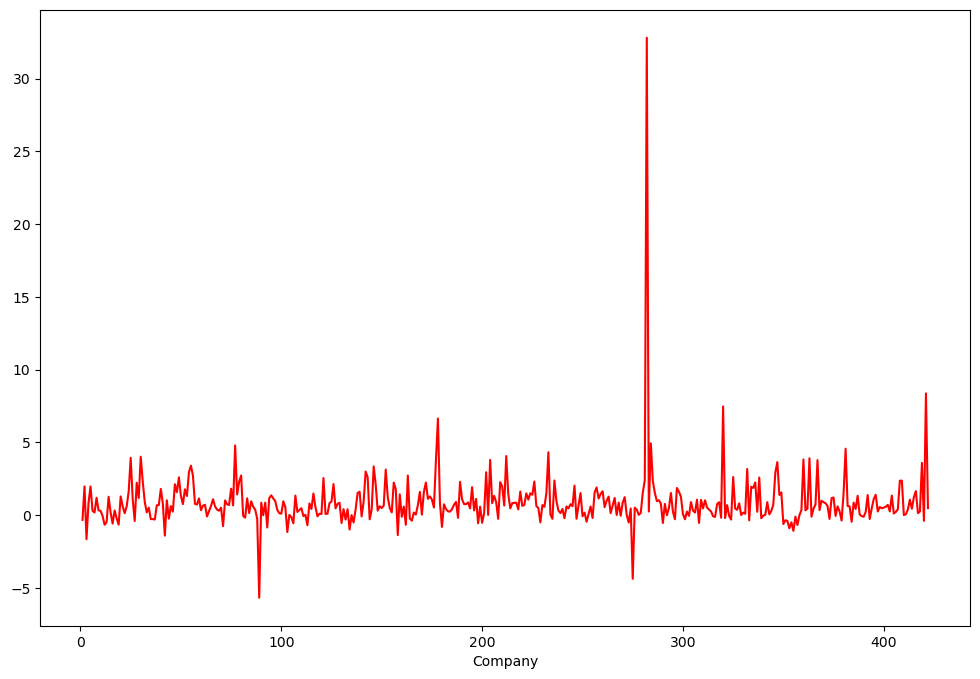

In [52]:
f, ax = plt.subplots(figsize= (12,8))
# group data based on company attribute
data_group_company = data.groupby(['Company'])

# select only the financial distress attribute and take mean of those values
data_group_company = data_group_company['Financial Distress'].mean().plot(c='red')

# plot 
plt.show()

In [48]:
# Calculate correlation matrix for the dataset
corr_matrix = data.drop(labels= ['Time', 'Company'], axis =1).corr()
df = data.drop(labels= ['Time', 'Company'], axis =1)
corr_matrix

,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
Financial Distress,1.000000,0.030928,0.272978,-0.089264,0.116837,0.274435,0.077260,0.042412,-0.006382,0.219091,...,-0.018746,0.110030,0.113511,0.096058,-0.013891,-0.116661,0.048210,0.442916,-0.010369,0.007209
x1,0.030928,1.000000,0.208851,-0.440321,-0.035504,0.109543,0.535425,0.914489,0.007329,-0.000506,...,0.007974,0.135594,0.138233,0.119818,0.066994,-0.045919,0.101691,0.053595,-0.067678,-0.087026
x2,0.272978,0.208851,1.000000,-0.504509,0.114046,0.892480,0.298078,0.214098,0.014020,0.729858,...,0.014677,0.010825,0.019887,0.034792,-0.009057,-0.104102,0.002707,0.281884,-0.144404,-0.095881
x3,-0.089264,-0.440321,-0.504509,1.000000,0.094481,-0.356252,-0.593620,-0.398730,-0.006290,-0.030976,...,0.014103,-0.227217,-0.227341,-0.174159,-0.041958,0.102163,0.023445,-0.111055,0.067579,0.107194
x4,0.116837,-0.035504,0.114046,0.094481,1.000000,0.194218,0.068274,-0.054573,-0.013797,0.135739,...,0.025610,0.084316,0.088898,0.091231,0.057900,-0.044051,-0.001579,0.203058,-0.041700,0.022684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x79,-0.116661,-0.045919,-0.104102,0.102163,-0.044051,-0.120217,-0.084758,-0.017951,0.036357,0.005528,...,-0.047490,-0.060471,-0.086835,-0.097437,0.527218,1.000000,-0.005852,-0.122266,-0.045728,-0.024067
x80,0.048210,0.101691,0.002707,0.023445,-0.001579,0.032084,0.126731,0.105686,0.004143,0.036929,...,0.012109,0.050148,0.051157,0.048959,0.039691,-0.005852,1.000000,0.039511,-0.012114,0.020329
x81,0.442916,0.053595,0.281884,-0.111055,0.203058,0.266739,0.101647,0.064812,-0.000214,0.181116,...,0.002413,0.159350,0.162778,0.134828,0.020161,-0.122266,0.039511,1.000000,-0.006151,0.001491
x82,-0.010369,-0.067678,-0.144404,0.067579,-0.041700,-0.144725,-0.076454,-0.080588,0.011114,-0.126204,...,0.007201,0.152981,0.150870,0.115171,0.033218,-0.045728,-0.012114,-0.006151,1.000000,0.647209


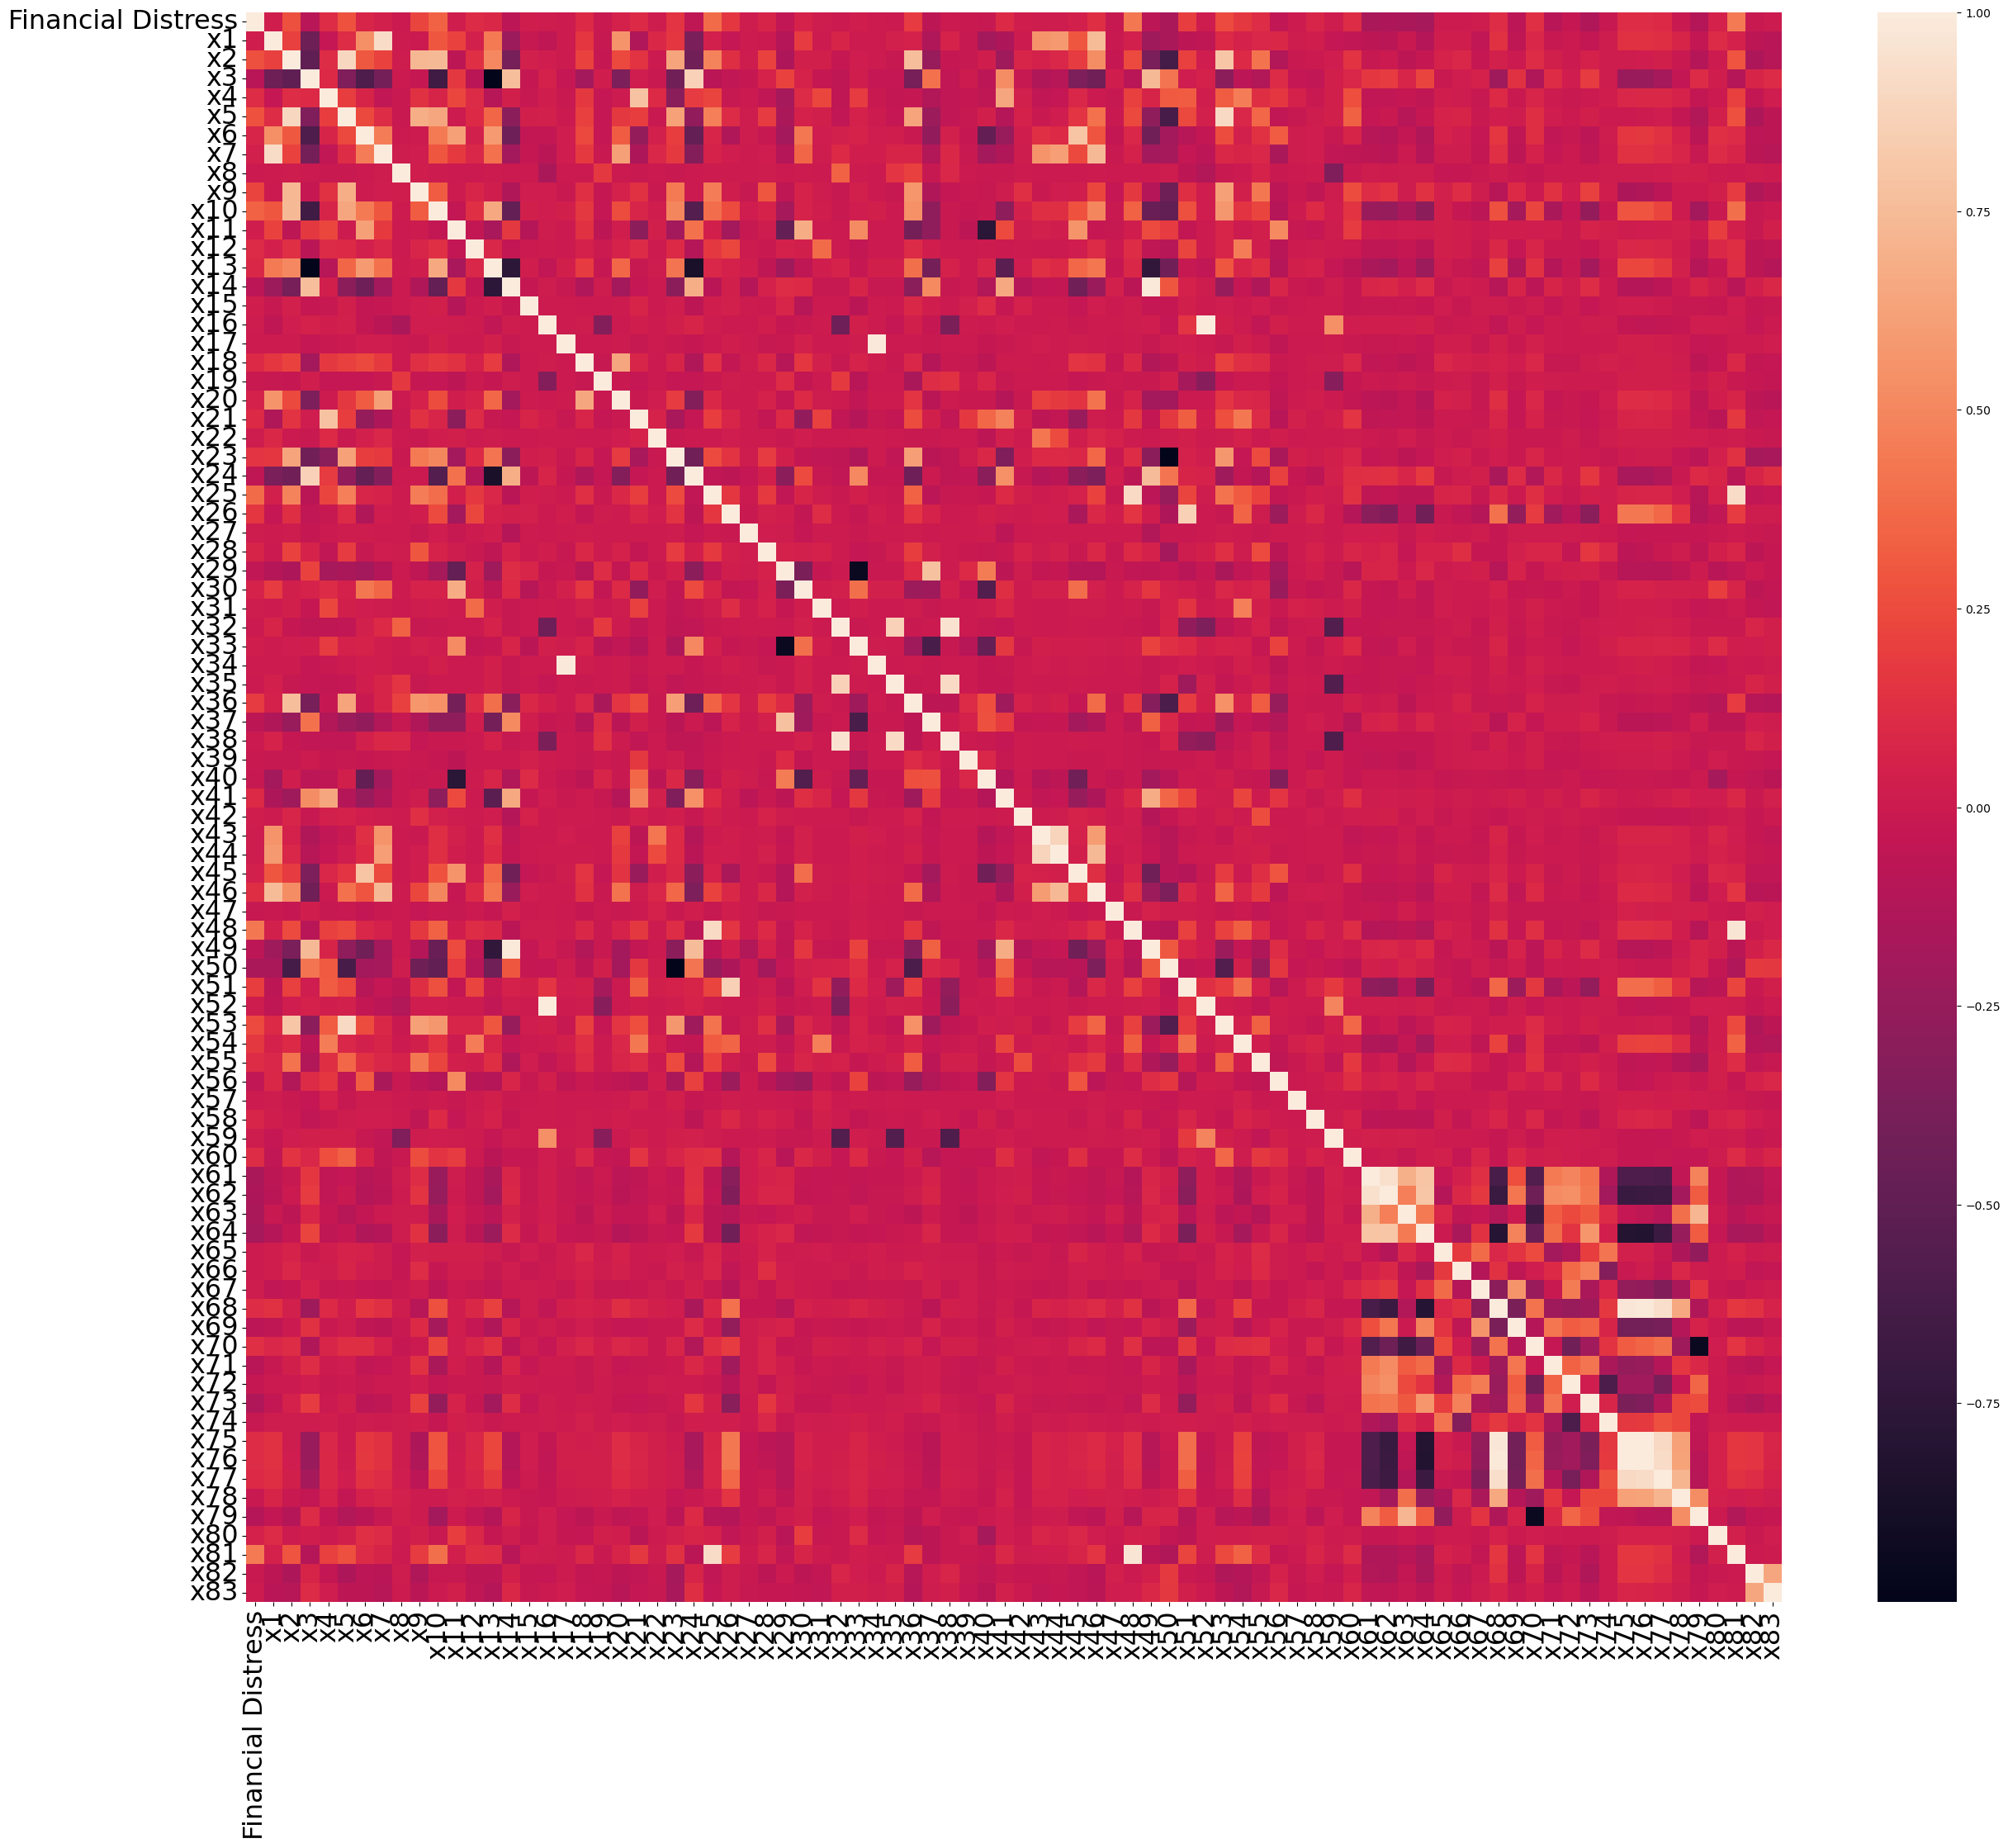

In [51]:
# Plot the correlation matrix as a heatmap
f, ax = plt.subplots(figsize= (30,25))
sns.heatmap(corr_matrix)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.show()

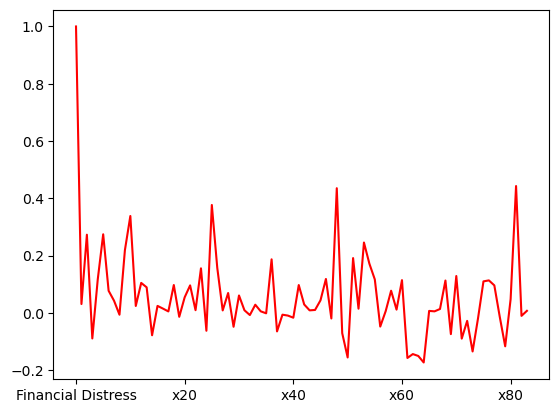

In [54]:
# Plot correlation of Financial Distress attribute with other attributes in dataset
correlation['Financial Distress'].plot(c='red')
plt.show()

# Split the dataset

In [61]:
# Divide dataset as features and prediction attribute
X = data.drop(['Company', 'Time','Financial Distress'], axis = 1)
y = data['Financial Distress']

In [72]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

# Initialize and Train the model

In [83]:
def train_model(model, X_train, y_train):
    # Train the  model.
    
    model = model.fit(X_train, y_train)
    return model

def make_predictions(model, X_test):
    # Make predictions using the trained model on test data (unseen data).
    
    return model.predict(X_test)

def calculate_metrics(y_actual, y_pred):
    # Compute Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).
    
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    mae = mean_absolute_error(y_actual, y_pred)
    return rmse, mae

def print_results(model_name, rmse, mae):
    # Print the results.
    
    print(f"{model_name.ljust(25)} RMSE: {rmse:.2f}, MAE: {mae:.2f}")

In [88]:
# Initialize the models
linear_reg        = LinearRegression()
random_forest_reg = RandomForestRegressor()
extra_trees_reg   = ExtraTreesRegressor()
adaboost_reg      = AdaBoostRegressor()

In [89]:
# Train the models on training data
linear_reg        = train_model(linear_reg, X_train, y_train)
random_forest_reg = train_model(random_forest_reg, X_train, y_train)
extra_trees_reg   = train_model(extra_trees_reg, X_train, y_train)
adaboost_reg      = train_model(adaboost_reg, X_train, y_train)

# Make Predictions on Test Data (Unseen data)

In [90]:
# Make predictions on unseen data (test data)
linear_reg_pred    = make_predictions(linear_reg, X_test)
random_forest_pred = make_predictions(random_forest_reg, X_test)
extra_trees_pred   = make_predictions(extra_trees_reg, X_test)
adaboost_pred      = make_predictions(adaboost_reg, X_test)

# Calculate RMSE and MAE

In [91]:
# Calculate RMSE and MAE
linear_reg_rmse, linear_reg_mae       = calculate_metrics(y_test, linear_reg_pred)
random_forest_rmse, random_forest_mae = calculate_metrics(y_test, random_forest_pred)
extra_trees_rmse, extra_trees_mae     = calculate_metrics(y_test, extra_trees_pred)
adaboost_rmse, adaboost_mae           = calculate_metrics(y_test, adaboost_pred)

# Print the obtained Results

In [92]:
# Print results
print_results("Linear Regression:", linear_reg_rmse, linear_reg_mae)
print_results("Random Forest Regression:", random_forest_rmse, random_forest_mae)
print_results("Extra Trees Regression:", extra_trees_rmse, extra_trees_mae)
print_results("AdaBoost Regression:", adaboost_rmse, adaboost_mae)

Linear Regression:        RMSE: 85.14, MAE: 4.48
Random Forest Regression: RMSE: 2.19, MAE: 0.65
Extra Trees Regression:   RMSE: 1.56, MAE: 0.61
AdaBoost Regression:      RMSE: 4.17, MAE: 1.13


# Insights and Conclusion

### Here we are able to see that Random Forest Regression and Extra Trees Regression have very low RMSE and MAE as compared to Linear Regression and Adaboost. Thus these two techniques work well on given dataset.
### Observations : 
### 1. Random Forest and Extra Trees both are ensemble techniques. They make use of multiple individual models to make predictions as compared to single model in linear regression.
### 2. We can observe the RMSE for Linear Regression is very high because it can get affected by outliers and it will also perform poorly on non-linear data.
### 3. Random Forest and Extra Trees on the other hand are able to handle outliers well because they split data into smaller subsets and then make predictions using majority vote of multiple trees.